Цель нашего проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска. И проведя анализ данных сделать выводы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings
import statistics
warnings.simplefilter('ignore')
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [56]:
display(stud.sample(20))
stud.info()

,school,sex,age,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
125,GP,M,15,GT3,T,3.0,4.0,services,services,home,father,1.0,1.0,0.0,yes,no,no,no,yes,yes,yes,no,5.0,5.0,5.0,5.0,0.0,60.0
248,GP,M,18,LE3,T,3.0,3.0,other,services,course,mother,1.0,2.0,1.0,no,yes,no,no,yes,yes,yes,yes,4.0,3.0,3.0,5.0,8.0,25.0
27,GP,M,15,GT3,T,4.0,2.0,health,services,other,mother,1.0,1.0,0.0,no,no,yes,no,yes,yes,yes,no,2.0,2.0,4.0,1.0,4.0,75.0
161,GP,M,15,GT3,T,3.0,2.0,other,other,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0
280,GP,M,17,GT3,A,4.0,2.0,services,other,home,mother,2.0,1.0,0.0,no,no,yes,yes,yes,yes,yes,no,4.0,3.0,4.0,5.0,30.0,40.0
119,GP,M,15,GT3,T,3.0,4.0,other,other,reputation,father,1.0,1.0,0.0,no,no,no,no,yes,yes,yes,no,3.0,4.0,3.0,4.0,6.0,65.0
78,GP,M,17,GT3,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,yes,no,yes,yes,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0
178,GP,M,16,GT3,T,4.0,2.0,teacher,services,other,mother,1.0,1.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,3.0,3.0,3.0,10.0,45.0
190,GP,F,16,GT3,T,2.0,3.0,services,services,course,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,3.0,3.0,2.0,10.0,65.0
265,GP,M,18,LE3,T,3.0,4.0,other,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,2.0,5.0,1.0,0.0,85.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      390 non-null    object 
 1   sex         390 non-null    object 
 2   age         390 non-null    int64  
 3   famsize     390 non-null    object 
 4   pstatus     390 non-null    object 
 5   medu        390 non-null    float64
 6   fedu        390 non-null    float64
 7   mjob        390 non-null    object 
 8   fjob        390 non-null    object 
 9   reason      390 non-null    object 
 10  guardian    390 non-null    object 
 11  traveltime  390 non-null    float64
 12  studytime   390 non-null    float64
 13  failures    390 non-null    float64
 14  schoolsup   390 non-null    object 
 15  famsup      390 non-null    object 
 16  paid        390 non-null    object 
 17  activities  390 non-null    object 
 18  nursery     390 non-null    object 
 19  higher      390 non-null    o

В данном датасете 395 строк, 13 числовых столбцов и 17 строковых. По условиям задачи у нас дано 29 колонок. Значения в колонке 'studytime, granular' отрицательны и не известны нам,поэтому удалим эту колонку:

In [3]:
stud.drop(['studytime, granular'], inplace=True, axis=1)

In [4]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

заменим названия некоторых колонок на нижний регистр:

In [5]:
stud.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
                'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
                'freetime', 'goout', 'health', 'absences', 'score']

In [6]:
# Поскольку данных у нас много,напишем функцию, где заменим пустые значения на моду:
for column in ['address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime',
               'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
               'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']:
    mode_value = stud[column].mode()[0]
    stud[column] = stud[column].fillna(mode_value)

In [7]:
# Проверим,все ли значения заменились:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   pstatus     395 non-null    object 
 6   medu        395 non-null    float64
 7   fedu        395 non-null    float64
 8   mjob        395 non-null    object 
 9   fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    float64
 13  studytime   395 non-null    float64
 14  failures    395 non-null    float64
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

In [8]:
# school.
# Дано 2 школы. Больше всего учеников из школы GP
pd.DataFrame(stud.school.value_counts())

,school
GP,349
MS,46


In [9]:
# sex.
# количество девочек(f) превышает количество мальчиков(m)
pd.DataFrame(stud.sex.value_counts())

,sex
F,208
M,187


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

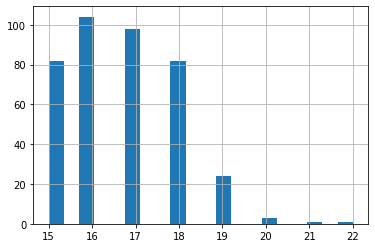

In [10]:
# age.рассмотрим его распределение
stud.age.hist(bins=20)
stud.age.describe()

Заметим,что показатели идут на спад и средний возраст учеников 16 лет. Поскольку в условии задан возраст от 15 до 22, не будем счиать наименьшие показатели за выбросы.

In [11]:
# address.
stud['address'].value_counts()  # Большинство учеников проживает в городе

U    312
R     83
Name: address, dtype: int64

In [12]:
# famsize
display(stud.famsize.value_counts())
# у большинства учеников в семье более 3 человек
stud.loc[:, ['famsize']].info()

GT3    288
LE3    107
Name: famsize, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [13]:
# pstatus
display(stud.pstatus.value_counts())
# у большинства учеников родители живут совместно
stud.loc[:, ['pstatus']].info()

T    359
A     36
Name: pstatus, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [14]:
# medu
stud.loc[:, ['medu']].info()
display(stud.medu.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


4.0    134
2.0    102
3.0     97
1.0     59
0.0      3
Name: medu, dtype: int64

In [15]:
# fedu
stud.loc[:, ['fedu']].info()
display(stud.fedu.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


2.0     130
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64

В колонке 'fedu' скорее всего была допущена ошибка,поменяем значение 40.0 на 4.0:


In [16]:
stud.fedu = stud.fedu.replace(40.0, 4.0)

count    395.000000
mean       2.759494
std        1.099321
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

count    395.000000
mean       2.486076
std        1.062362
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

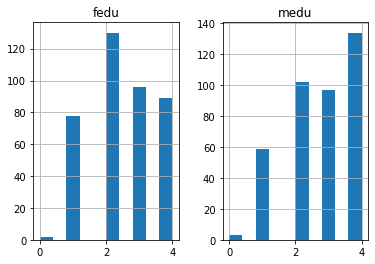

In [17]:
# Рассмотрим распределение признака колонок ['medu'],['fedu']
stud[['medu', 'fedu']].hist()
display(stud.medu.describe())
display(stud.fedu.describe())

По гистограмам можно сделать вывод,что большее количество с высшим образованием у матерей

In [84]:
# Посмотрим на распределение работ матерей и отцов
display(stud.mjob.value_counts())
display(stud.fjob.value_counts())

other       149
services     96
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

other       232
services     99
teacher      28
at_home      16
health       15
Name: fjob, dtype: int64

In [20]:
# оценим количество уникальных значений для колонки 'reason'
# большинство выбирают школу из-за "образовательной программы"
display(stud.reason.value_counts())

course        154
home          104
reputation    103
other          34
Name: reason, dtype: int64

In [21]:
# Проверим, кто из родителей в основном является опекуном
display(stud.guardian.value_counts())

mother    281
father     86
other      28
Name: guardian, dtype: int64

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

count    395.000000
mean       1.407595
std        0.678490
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

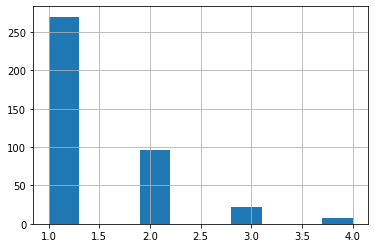

In [23]:
# Посмотрим на распределение значений колонки 'traveltime'
display(stud.traveltime.value_counts())
stud.traveltime.hist()
stud.traveltime.describe()

Можно сделать вывод,что большинство учеников добираются до школы менее 15 минут. У нас есть колонка address(тип адреса ученика).На мой взгляд, они зависимы между собой и нам достаточно знать только данные из traveltime.Поэтому удалим колонку address:

In [24]:
stud.drop(['address'], inplace=True, axis=1)

In [85]:
# Посмотрим на распределение значений для ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
display(stud.schoolsup.value_counts())
display(stud.famsup.value_counts())
display(stud.paid.value_counts())
display(stud.activities.value_counts())
display(stud.nursery.value_counts())
display(stud.higher.value_counts())
display(stud.internet.value_counts())
display(stud.romantic.value_counts())

no     341
yes     49
Name: schoolsup, dtype: int64

yes    253
no     137
Name: famsup, dtype: int64

no     237
yes    153
Name: paid, dtype: int64

yes    207
no     183
Name: activities, dtype: int64

yes    312
no      78
Name: nursery, dtype: int64

yes    372
no      18
Name: higher, dtype: int64

yes    335
no      55
Name: internet, dtype: int64

no     268
yes    122
Name: romantic, dtype: int64

Можно отметить,что у большинства детей есть семейная образовательная поддержка и дополнительные платные занятия по математике,большинство посещало детский сад,также есть увлечения.Практически у всех в доступе есть интернет и нет романтических отношений - все это благоприятно влияет на успеваемость в школе. 
Но так же только очень маленькая часть школьников имеет доп. образовательную поддержку в школе, что будет плохо сказываться на знаниях.

In [26]:
# Посмотрим на распределение признака колонки 'studytime'
display(stud.studytime.value_counts())

2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

count    395.000000
mean       2.037975
std        0.834580
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

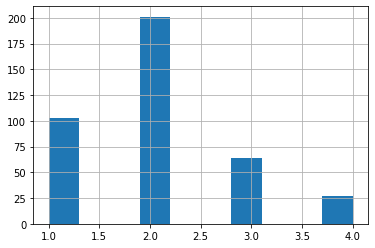

In [27]:
stud.studytime.hist()
stud.studytime.describe()

По графику можем сказать,что в среднем дети тратят от 2-5 часов в неделю на учебу помимо школы. Это показатель меньше среднего,что сказывается на успеваемости

0.0    315
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

count    395.000000
mean       0.318987
std        0.726244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

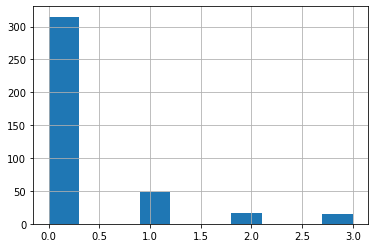

In [28]:
# failures
display(stud.failures.value_counts())
stud.failures.hist()
stud.failures.describe()

можно сказать,что в основном у студентов нет внеучебных неудач

In [86]:
# famrel.Скорее всего была допущена ошибка.Заменим значение -1:
display(stud.famrel.value_counts())
stud.famrel = stud.famrel.replace(-1.0, 1.0)

4.0    208
5.0     97
3.0     62
2.0     16
1.0      7
Name: famrel, dtype: int64

count    395.000000
mean       3.954430
std        0.859671
min        1.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64

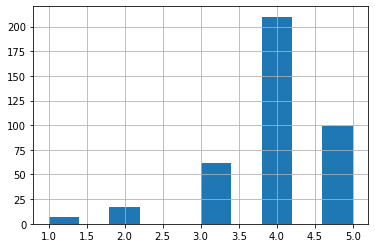

In [35]:
stud.famrel.hist()
stud.famrel.describe()

Семейные отношения, в основном, хорошие

3.0    164
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

count    395.000000
mean       3.954430
std        0.859671
min        1.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64

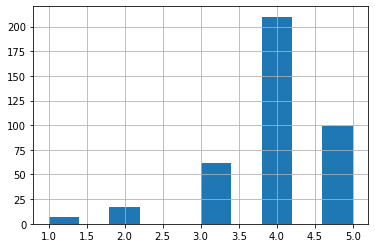

In [37]:
# freetime
display(stud.freetime.value_counts())
stud.famrel.hist()
stud.famrel.describe()

По графику заметно,что свободное время после школы в основном есть

3.0    135
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

count    395.000000
mean       3.954430
std        0.859671
min        1.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64

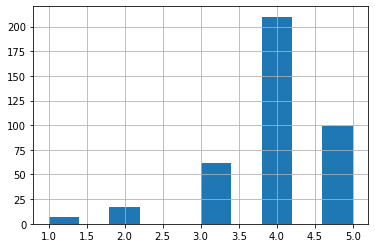

In [39]:
# goout
display(stud.goout.value_counts())
stud.famrel.hist()
stud.famrel.describe()

Заметим, что в среднем, дети проводят много времени с друзьями. 

5.0    153
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

count    395.000000
mean       3.587342
std        1.397729
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

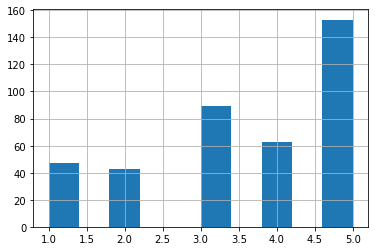

In [43]:
# health
display(stud.health.value_counts())
stud.health.hist()
stud.health.describe()

В среднем,состояние здоровья наблюдается немного выше среднего.

count    395.000000
mean       7.058228
std       23.138935
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

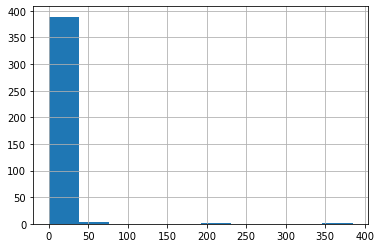

In [46]:
# Посмотрим распределение признака 'absences'
stud.absences.hist()
stud.absences.describe()

Видим, что основное распределение лежит между 0 и 40 пропусками и есть потенциальные выбросы свыше 100 (об этом нам говорит здравый смысл).

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


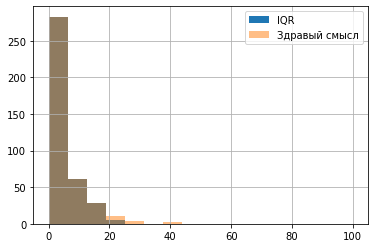

In [48]:
# отфильтруем выбросы
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

stud.absences.loc[stud.absences.between(
    perc25 - 1.5*IQR,
    perc75 + 1.5*IQR)].hist(bins=16, range=(0, 100), label='IQR')

stud.absences.loc[stud.absences <= 50].hist(
    alpha=0.5, bins=16, range=(0, 100), label='Здравый смысл')

plt.legend()

In [60]:
stud = stud.loc[stud.absences <= 40]

count    390.000000
mean      52.205128
std       22.816108
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

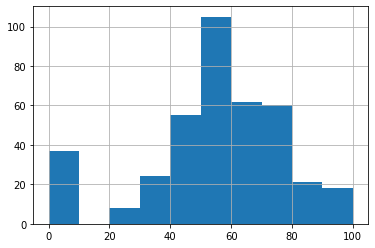

In [54]:
# score
stud.score.hist()
display(stud.score.describe())

Система оценок здесь 100-бальная.Срденяя оценка по гос.экзамену - 52 (средний показатель)

Рассмотрим корреляции только для числовых столбцов.Выясним, какие столбцы коррелируют с оценкой на экзамене по математике. И поймем, какие параметры стоит оставить для модели, а какие — исключить. 

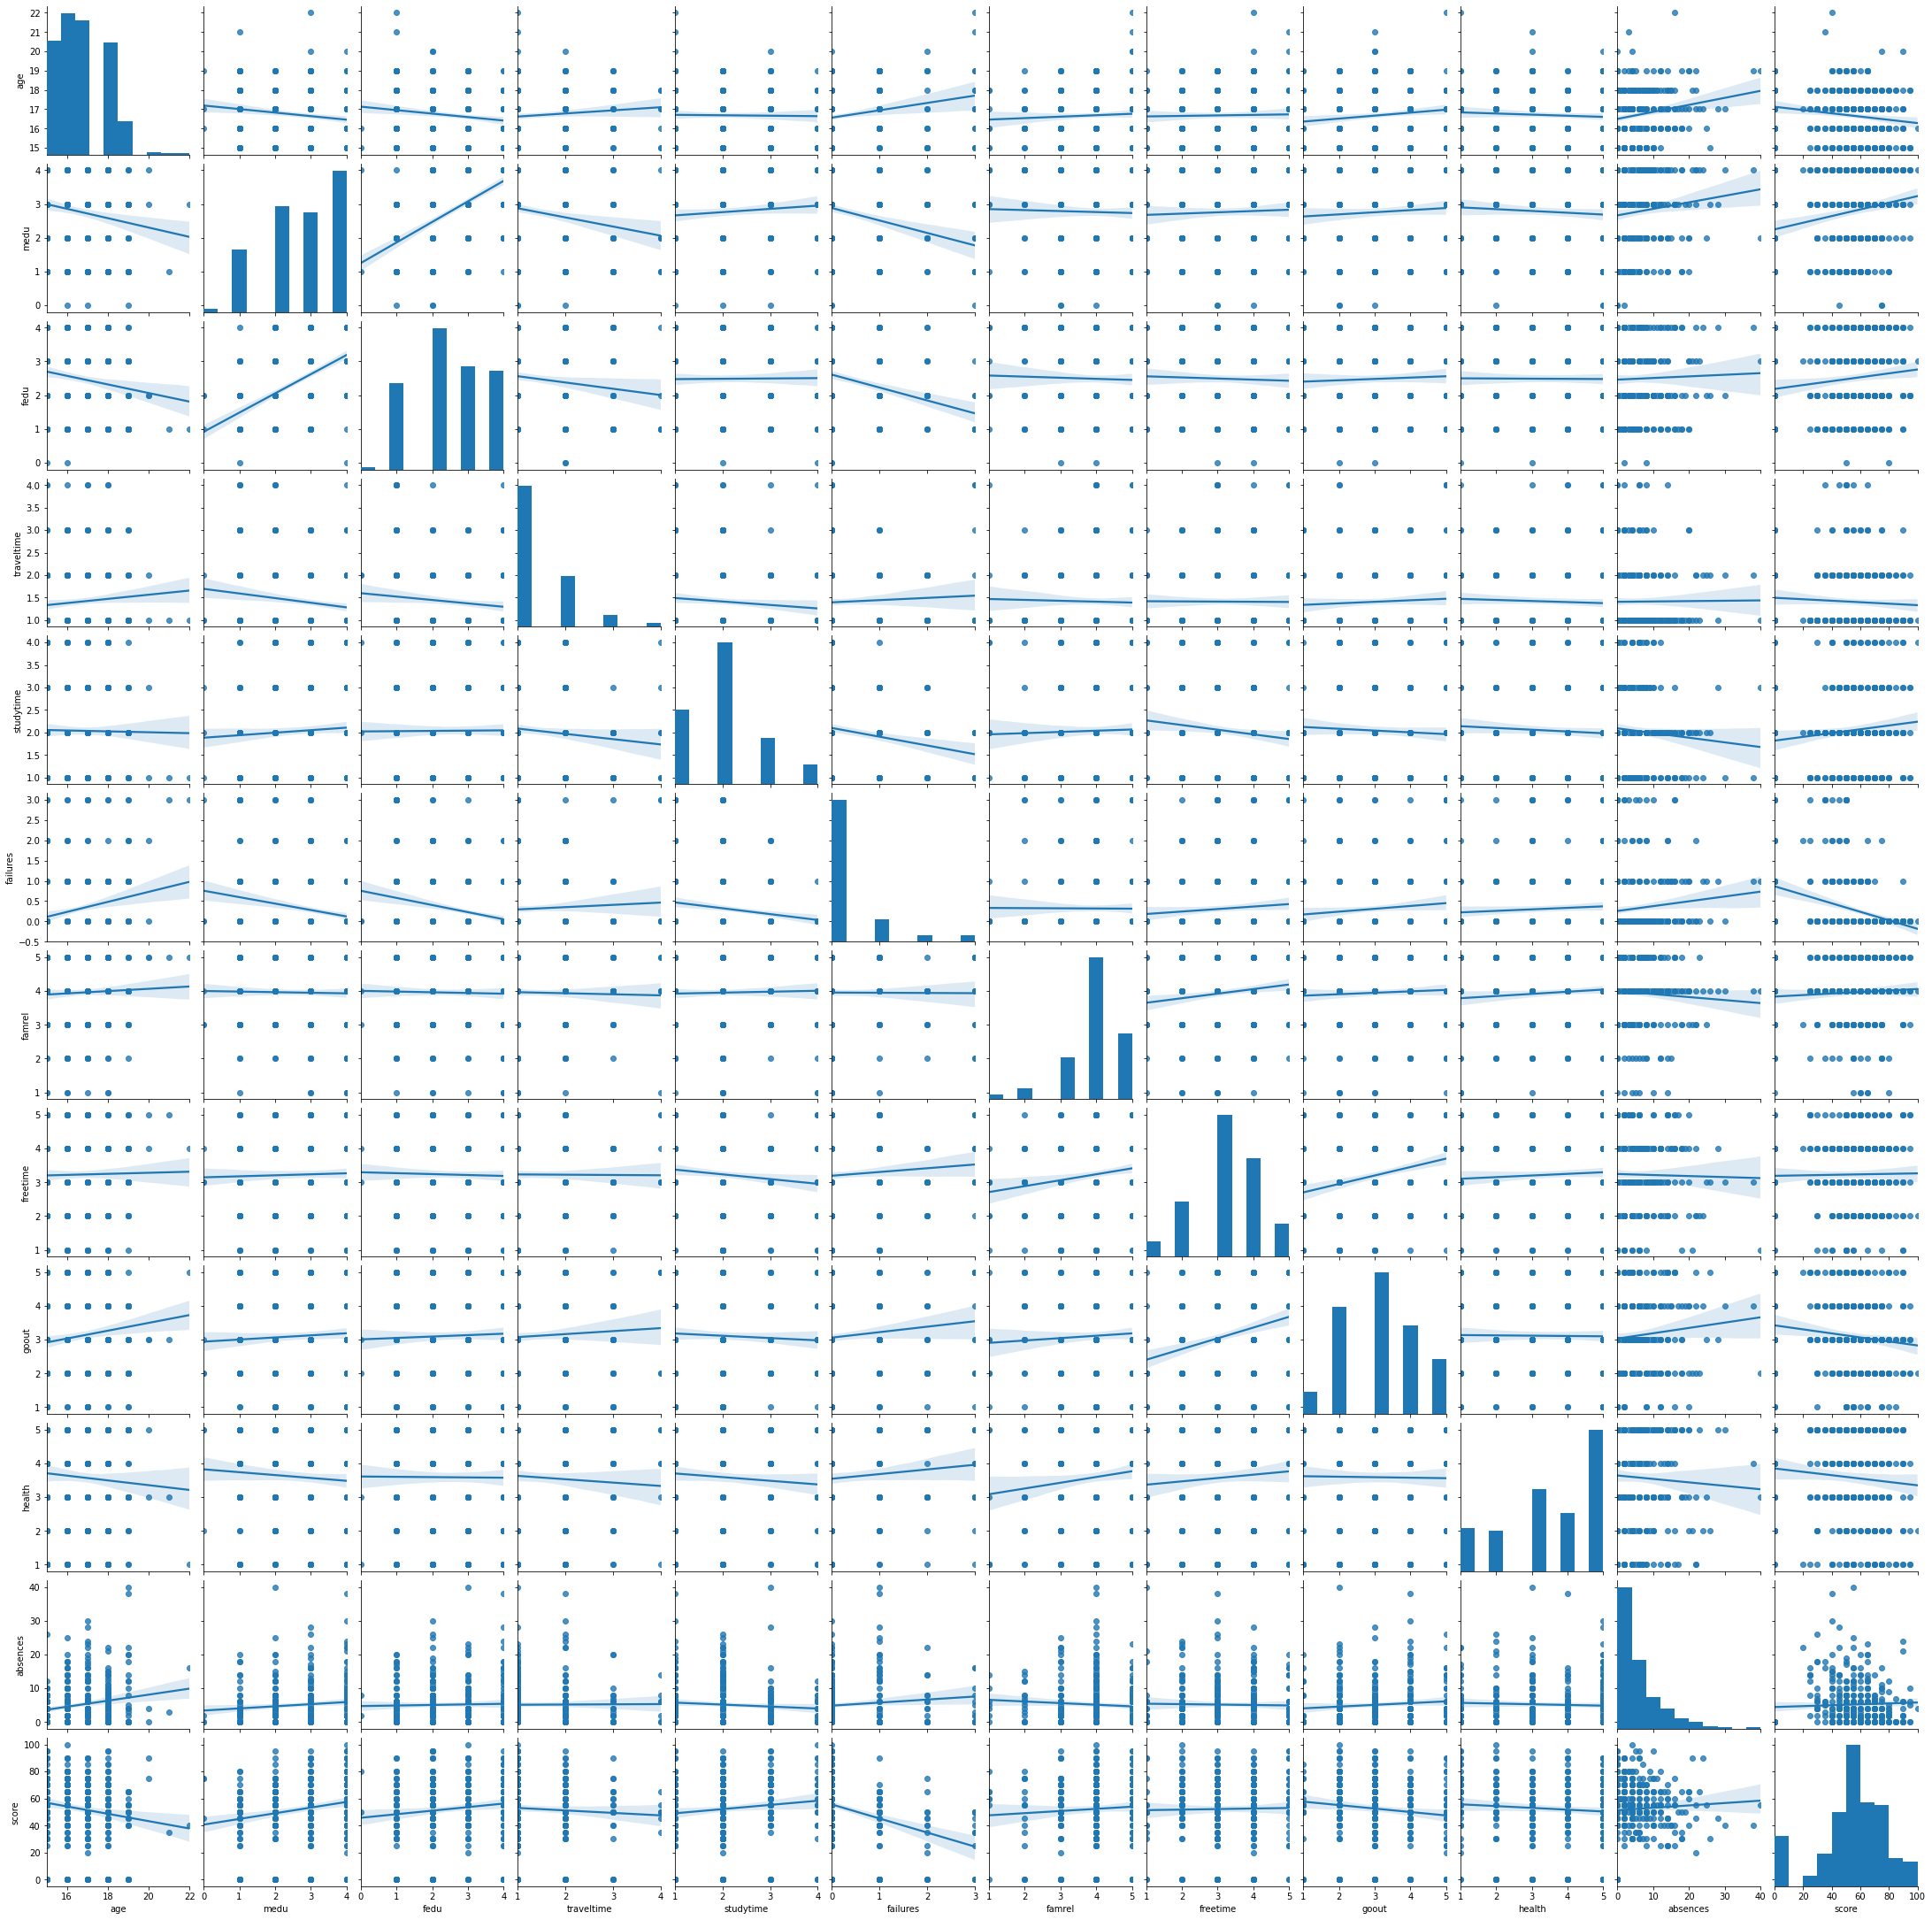

In [64]:
sns.pairplot(stud, kind='reg')

In [61]:
# Данных слишком много,используем матрицу для наглядности
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.159511,-0.151390,0.086332,-0.015196,0.217057,0.050503,0.020399,0.133803,-0.064287,0.180199,-0.151741
medu,-0.159511,1.000000,0.588583,-0.166915,0.073626,-0.242023,-0.022535,0.033902,0.062361,-0.067305,0.110097,0.203459
fedu,-0.151390,0.588583,1.000000,-0.118597,0.007828,-0.259287,-0.026089,-0.029921,0.040867,-0.006857,0.028205,0.123285
traveltime,0.086332,-0.166915,-0.118597,1.000000,-0.095085,0.052728,-0.024760,-0.005851,0.054718,-0.048526,0.007200,-0.055071
studytime,-0.015196,0.073626,0.007828,-0.095085,1.000000,-0.167846,0.027498,-0.120469,-0.051991,-0.065333,-0.077739,0.114281
failures,0.217057,-0.242023,-0.259287,0.052728,-0.167846,1.000000,-0.005287,0.082441,0.106340,0.071561,0.103553,-0.330688
famrel,0.050503,-0.022535,-0.026089,-0.024760,0.027498,-0.005287,1.000000,0.154116,0.054654,0.104429,-0.065433,0.059834
freetime,0.020399,0.033902,-0.029921,-0.005851,-0.120469,0.082441,0.154116,1.000000,0.282292,0.069288,-0.019537,0.017168
goout,0.133803,0.062361,0.040867,0.054718,-0.051991,0.106340,0.054654,0.282292,1.000000,-0.011436,0.090283,-0.123587
health,-0.064287,-0.067305,-0.006857,-0.048526,-0.065333,0.071561,0.104429,0.069288,-0.011436,1.000000,-0.046095,-0.081490


Судя по матрице корреляций,сильно коррелирующих между собой показателей не выявлено. Наибольшая степень связи с score у параметров: failures(неудачи вне школы будут сказываться и на оценке), medu и fedu(более образованные родители всегда смогут больше помочь с учебой ребенку,что будет влиять на оценку), goout(чем меньше этот показатель,тем выше оценка по математике,значит ребенок больше проводит времени за учебой),age(отрицательный показатель говорит о том,что с возрастом оценка ниже,что не совсем логично.При это studytime мало скоррелирован с age,а значит age не особо влияет на оценку)

In [67]:
# Для номинативных переменных рассмотрим, различаются ли распределения оценки в зависимости от значения этих переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

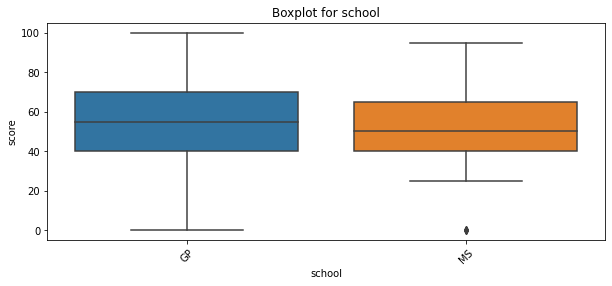

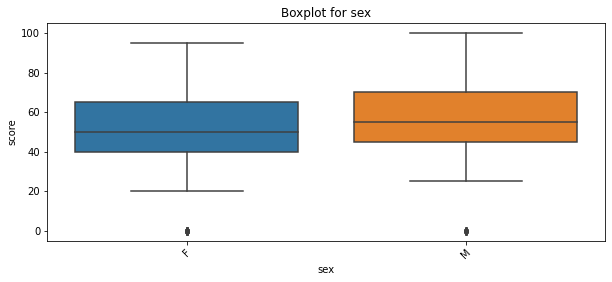

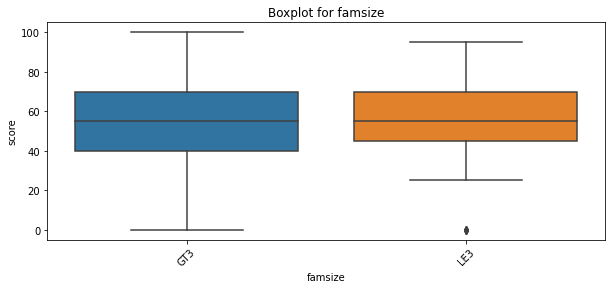

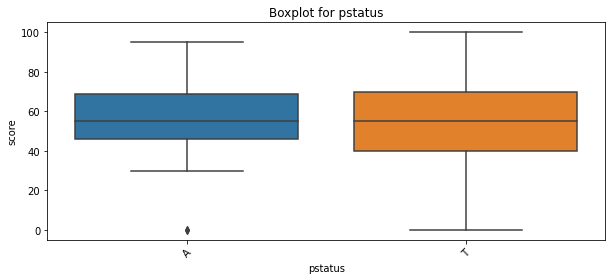

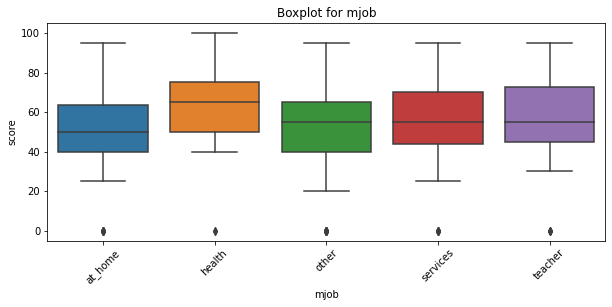

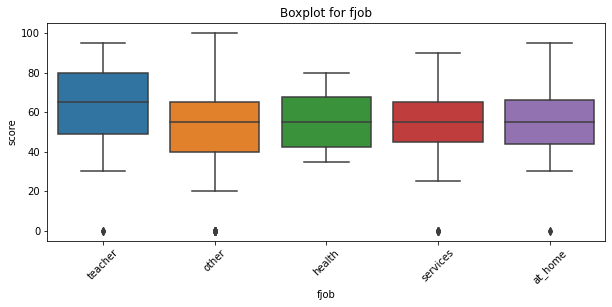

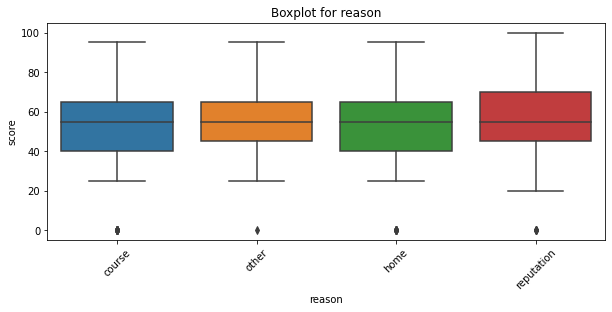

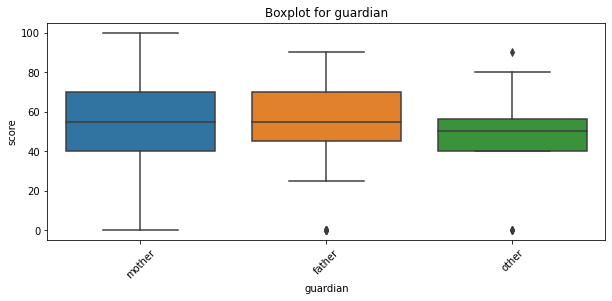

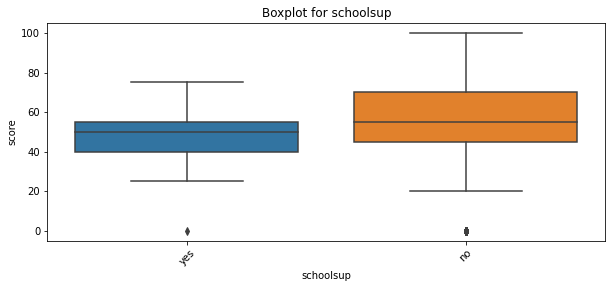

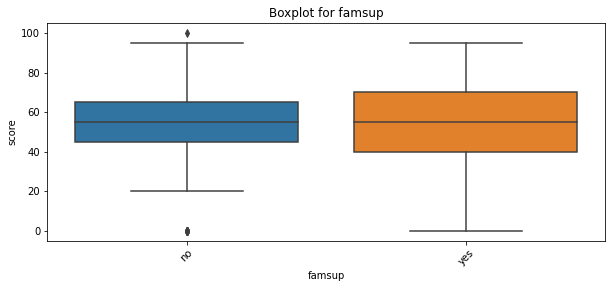

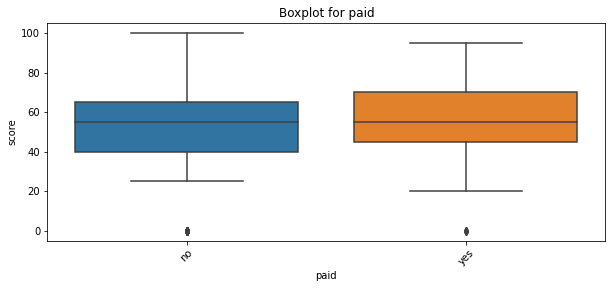

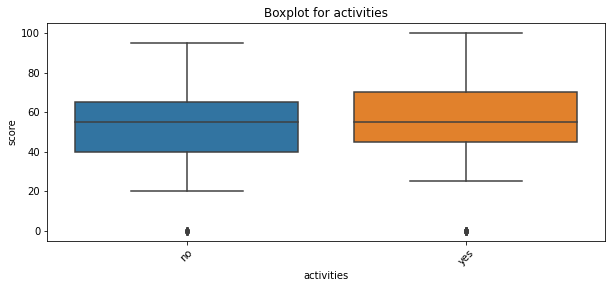

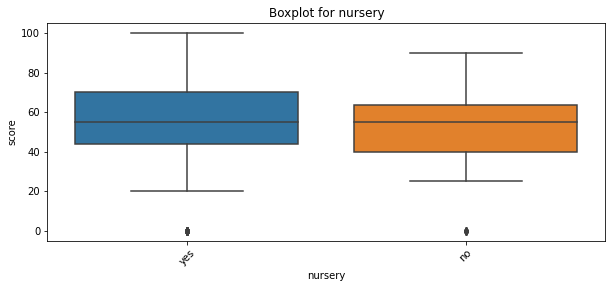

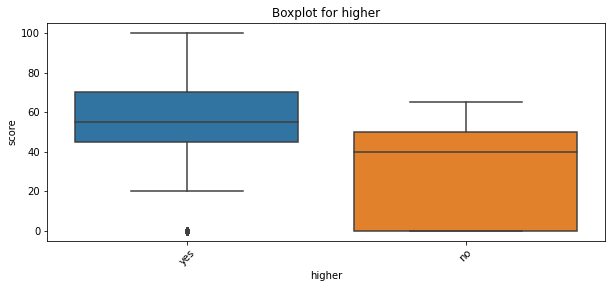

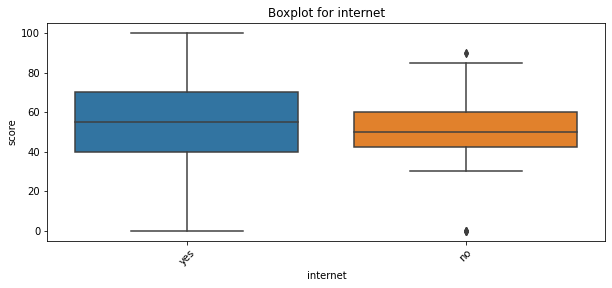

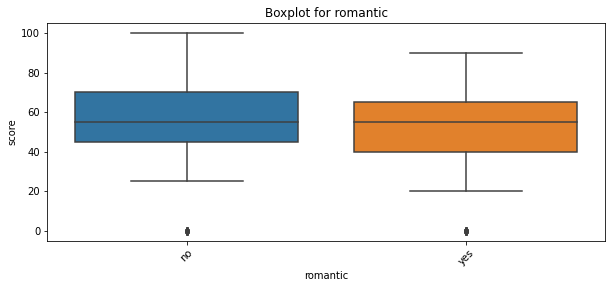

In [79]:
for col in ['school', 'sex', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

По графикам,на мой взгляд,большее влияние могут оказывать показатели: higher(если ребенок стремится получить высшее образование,значит есть мотивация и скорее всего он будет больше стараться получить хорошую оценку), mjob(ученики матерей,работающих в сфере здравоохранения,имеют немного выше оценку,но не значительно),fjob(дети отцов,работающих учителями,имеют более высокую оценку.Я пологаю,что родители-учителя больше следят за успеваемостью детей и,вообщем, могут помочь с некоторыми домашними заданиями).

Проведем теста Стьюдента и проверим, есть ли статистическая разница в распределении оценок по номинативным признакам:

In [77]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [80]:
for col in ['school', 'sex', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup',
            'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Тест показал такие значимые параметры как: sex,mjob,shoolsup,higher,romantic.

In [87]:
stud_for_model = stud.loc[:, ['sex','medu', 'fedu', 'mjob', 'schoolsup', 'higher', 'failures', 'goout','romantic']]
stud_for_model.head(5)

,sex,medu,fedu,mjob,schoolsup,higher,failures,goout,romantic
0,F,4.0,4.0,at_home,yes,yes,0.0,4.0,no
1,F,1.0,1.0,at_home,no,yes,0.0,3.0,no
2,F,1.0,1.0,at_home,yes,yes,3.0,2.0,no
3,F,4.0,2.0,health,no,yes,0.0,2.0,yes
4,F,3.0,3.0,other,no,yes,0.0,2.0,no


Выводы.
Проведя анализ влияния данных условий жизни учеников на оценку по математике, получили следующие выводы:
-в данных было достаточно пустых значений,которые мы заменили на более часто втсречаемые(мода)
-выбросы были обнаружены только в колонке absences,и несколько ошибок в famrel и fedu.Данные достаточно чистые.
-по итогам корреляционного анализа,можно сделать вывод,что на успеваемость влияет: образование родителей, которые скорее всего помогают ребенку с учебой; неудачи ребенка вне школы; проведение времени с друзьями - говорит о недостаточно уделяемом времени учебе.
-Такой показатель как higher, по итогу анализа, показал, что достаточно сильно вляет на оценку и, в целом, я считаю, на обучение. Так же я сделаю вывод,что больше времени внешкольному обучению уделяют матери.
-на мой взгляд, наиболее вжаные параметры для построения модели я выявила: sex, medu, fedu, mjob, schoolsup, higher, failures, goout, romantic.